null hypothesis:  H0:H^girls=H^boys 


In [1]:
import pandas as pd 
df = pd.read_csv('school.csv')
G=df[df.sex=='f'].height.values
B=df[df.sex=='m'].height.values


In [2]:
from scipy import stats
result=stats.ttest_ind(G,B)
print(result)

Ttest_indResult(statistic=-3.127216049757464, pvalue=0.0019873593355122674)


In [7]:
import pandas as pd 
df = pd.read_csv('school.csv')
k=df[df.sex=='f'].weight.values
c=df[df.sex=='m'].weight.values
print(df[df.sex=='f'].weight.mean())

print(stats.ttest_ind(c,k))

44.8504414054054
Ttest_indResult(statistic=1.8145945910513834, pvalue=0.07086126050383235)


In [8]:
df.groupby(by='sex').mean()['height']

sex
f    153.736668
m    157.742379
Name: height, dtype: float64

C:\Program Files\KMSpico\temp\ipykernel_13584\1145588356.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(G,label='Girls')
C:\Program Files\KMSpico\temp\ipykernel_13584\1145588356.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(B,label='boys')


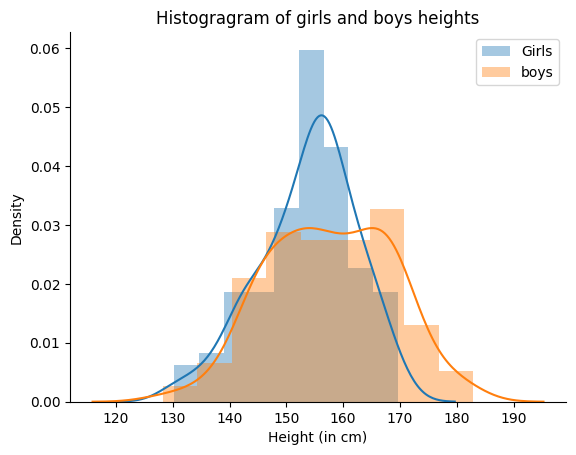

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
G=df[df.sex=='f'].height.values
B=df[df.sex=='m'].height.values
sns.distplot(G,label='Girls')
sns.distplot(B,label='boys')
plt.legend()
plt.title('Histogragram of girls and boys heights')
plt.xlabel('Height (in cm)')
sns.despine()

C:\Program Files\KMSpico\temp\ipykernel_13584\1631728149.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfc.mpg)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

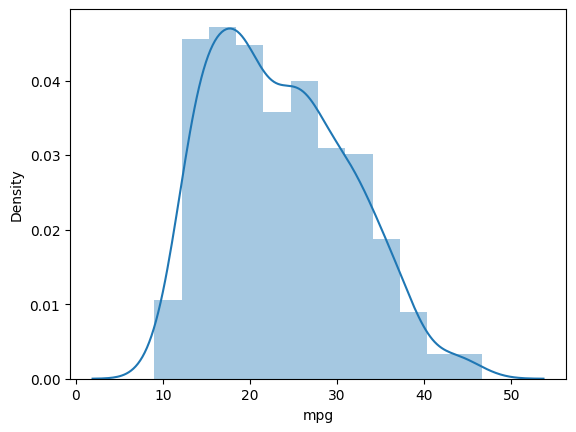

In [13]:
dfc=pd.read_csv('auto-mpg.csv')
sns.distplot(dfc.mpg)

C:\Program Files\KMSpico\temp\ipykernel_13584\2322667084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfc.acceleration)


<AxesSubplot:xlabel='acceleration', ylabel='Density'>

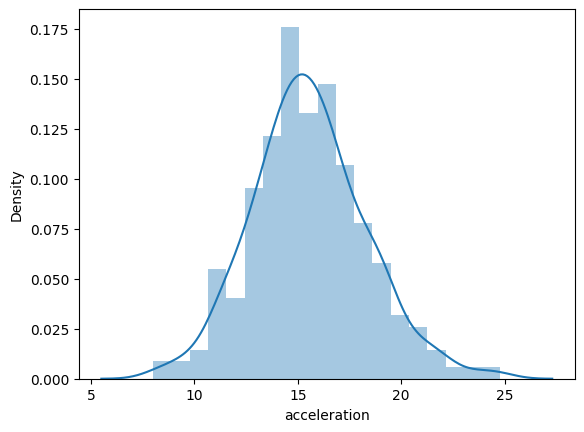

In [14]:
sns.distplot(dfc.acceleration)

In [21]:
import numpy as np
dfc['acceleration']=(dfc.acceleration-np.mean(dfc.acceleration))/np.std(dfc.acceleration)
dfc['mpg']=(dfc.mpg-np.mean(dfc.mpg))/np.std(dfc.mpg)

In [22]:
dfc[['mpg','acceleration']].describe().loc[['mean','std']]

,mpg,acceleration
mean,2.537653e-16,3.262696e-16
std,1.001278e+00,1.001278e+00


In [23]:
stats.kstest(dfc.acceleration,'norm')

KstestResult(statistic=0.0512416927227467, pvalue=0.24623279055646308)

In [24]:
stats.kstest(dfc.mpg,'norm')


KstestResult(statistic=0.08201816765908448, pvalue=0.009652915992822779)

In [27]:
dfc=pd.read_csv('auto-mpg.csv')
dfc['log_mpg']=np.log(dfc.mpg +1)

dfc['log_mpg']=(dfc.log_mpg-np.mean(dfc.log_mpg))/np.std(dfc.log_mpg)
stats.kstest(dfc.log_mpg,'norm')





KstestResult(statistic=0.06194579881314921, pvalue=0.09464890172649876)

C:\Program Files\KMSpico\temp\ipykernel_13584\3300400777.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfc.log_mpg)


<AxesSubplot:xlabel='log_mpg', ylabel='Density'>

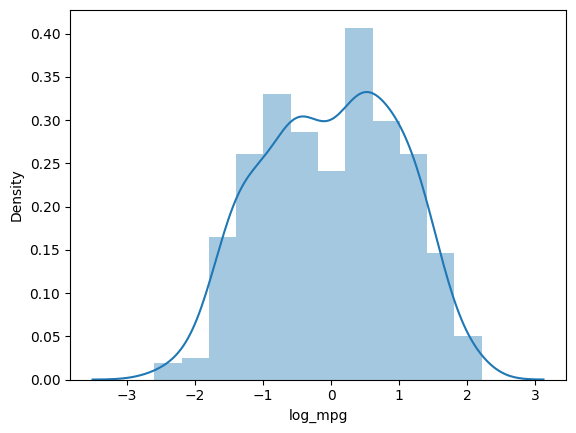

In [28]:
sns.distplot(dfc.log_mpg)

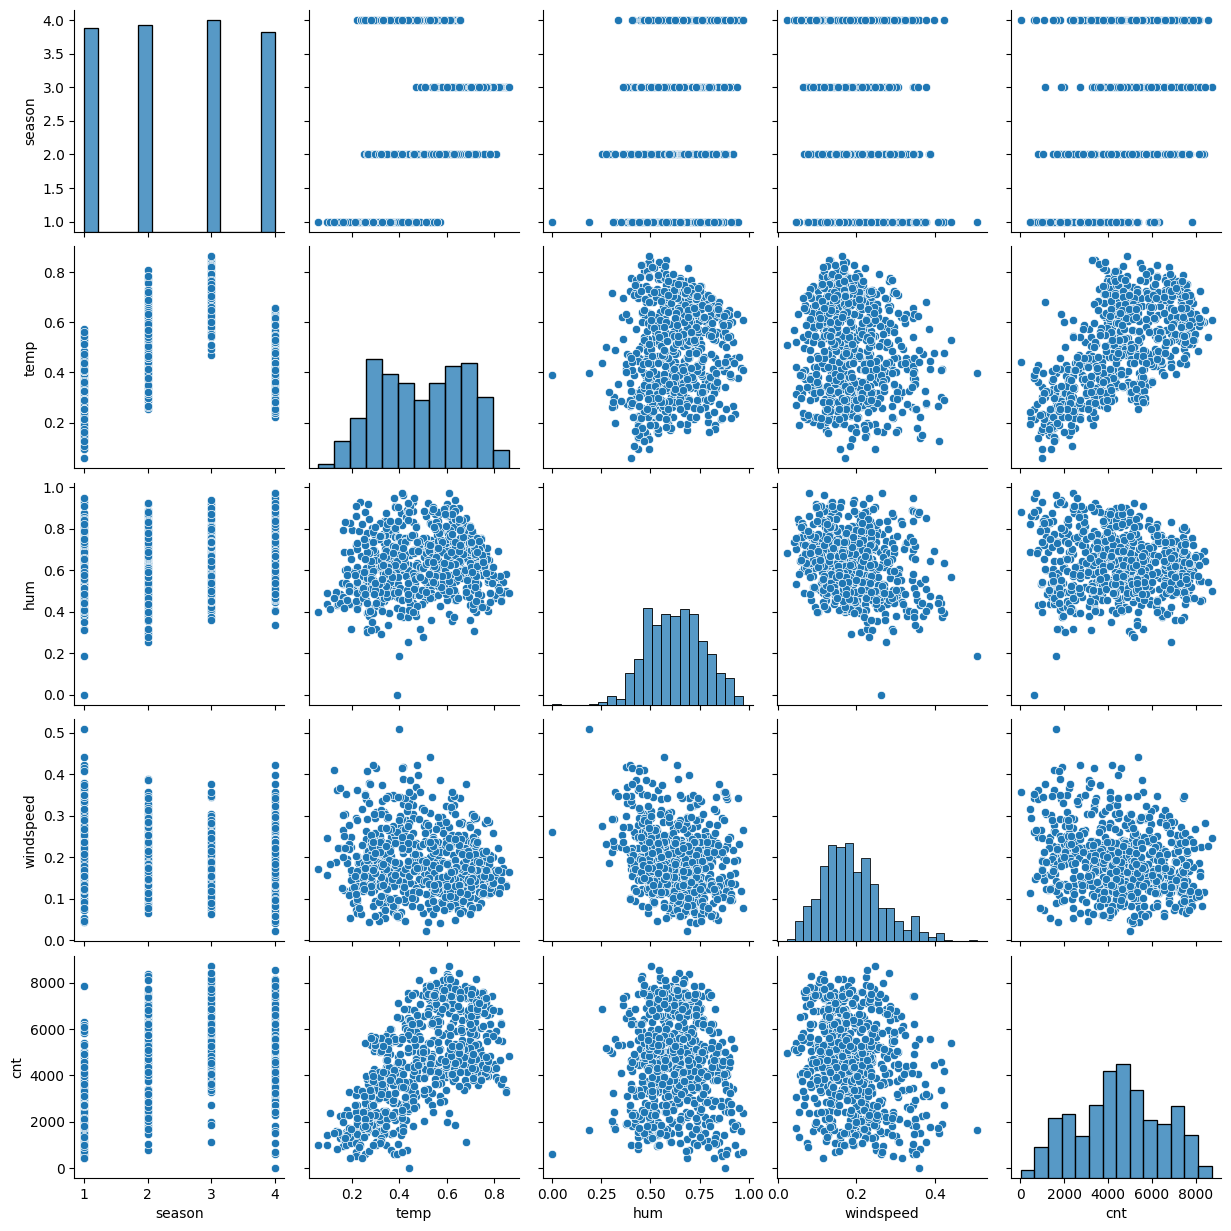

In [31]:
d=pd.read_csv('day.csv')
d = d[['season', 'temp','hum','windspeed','cnt']]
sns.pairplot(d)
plt.savefig("d.jpg")

In [39]:
d.corr(method='pearson')['windspeed']

season      -0.229046
temp        -0.157944
hum         -0.248489
windspeed    1.000000
cnt         -0.234545
Name: windspeed, dtype: float64

In [40]:
d.groupby(by='season').mean()

,temp,hum,windspeed,cnt
season,,,,
1,0.297748,0.582903,0.214537,2604.132597
2,0.544405,0.626948,0.203507,4992.331522
3,0.706309,0.633482,0.172095,5644.303191
4,0.422906,0.668719,0.171995,4728.162921


In [42]:
d['logwindspeed'] = np.log(d.windspeed +1)

# Normalize the new logwindspeed variable:
d['logwindspeed_c'] = (d['logwindspeed'] - d['logwindspeed'].mean()) / d['logwindspeed'].std()

In [43]:
print(stats.kstest(d.logwindspeed_c , 'norm'))


KstestResult(statistic=0.04977846893415816, pvalue=0.051629909641498384)


In [48]:
B=d[d.season==3].cnt.values
k=d[d.season==2].cnt.values
print(k)

print(stats.ttest_ind(B,k))


[2077 2703 2121 1865 2210 2496 1693 2028 2425 1536 1685 2227 2252 3249
 3115 1795 2808 3141 1471 2455 2895 3348 2034 2162 3267 3126  795 3744
 3429 3204 3944 4189 1683 4036 4191 4073 4400 3872 4058 4595 5312 3351
 4401 4451 2633 4433 4608 4714 4333 4362 4803 4182 4864 4105 3409 4553
 3958 4123 3855 4575 4917 5805 4660 4274 4492 4978 4677 4679 4758 4788
 4098 3982 3974 4968 5312 5342 4906 4548 4833 4401 3915 4586 4966 4460
 5020 4891 5180 3767 4844 5119 4744 4010 6230 6871 8362 3372 4996 5558
 5102 5698 6133 5459 6235 6041 5936 6772 6436 6457 6460 6857 5169 5585
 5918 4862 5409 6398 7460 7132 6370 6691 4367 6565 7290 6624 1027 3214
 5633 6196 5026 6233 4220 6304 5572 5740 6169 6421 6296 6883 6359 6273
 5728 4717 6572 7030 7429 6118 2843 5115 7424 7384 7639 8294 7129 4359
 6073 5260 6770 6734 6536 6591 6043 5743 6855 7338 4127 8120 7641 6998
 7001 7055 7494 7736 7498 6598 6664 4972 7421 7363 7665 7702 6978 5099
 6825 6211]
Ttest_indResult(statistic=3.9765418611661243, pvalue=8.4115098115